Load dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'path_to_your_file.csv' with the actual file path)
data = pd.read_csv(r'C:\Users\SHIZA  SHABBIR\Downloads\tested (1).csv')

# Preview the dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [11]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

data.drop('Cabin', axis=1, inplace=True)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Data cleaning

In [12]:

# Fill missing 'Age' values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


C:\Users\SHIZA  SHABBIR\AppData\Local\Temp\ipykernel_11992\2483752068.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\SHIZA  SHABBIR\AppData\Local\Temp\ipykernel_11992\2483752068.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [13]:
# Drop rows with any remaining missing values
data.dropna(inplace=True)

In [14]:
# Convert categorical variables to numerical for analysis
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Check for duplicates
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)


Number of duplicate rows:
0


# Display summary statistics
print("\nSummary statistics:")
print(data.describe())

In [ ]:
Exploratory data Analysis 

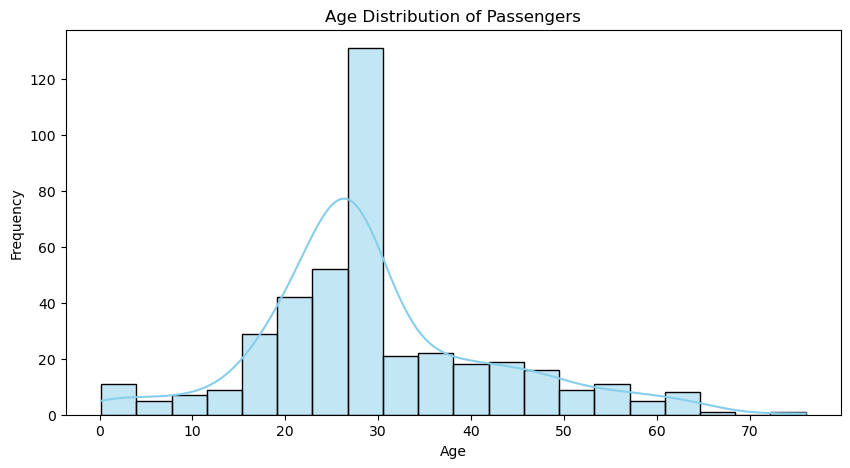

In [16]:
# Plot distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\SHIZA  SHABBIR\AppData\Local\Temp\ipykernel_11992\2301795556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='pastel')


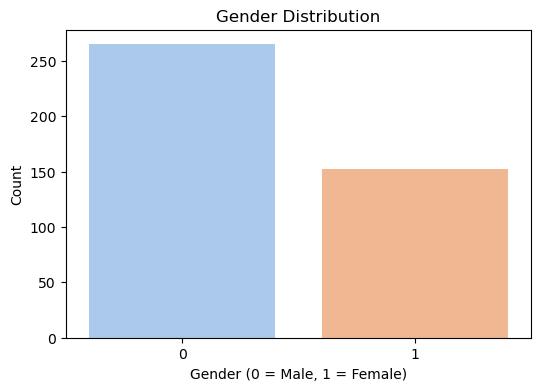

In [17]:
# Bar plot for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

C:\Users\SHIZA  SHABBIR\AppData\Local\Temp\ipykernel_11992\3614318746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='viridis')


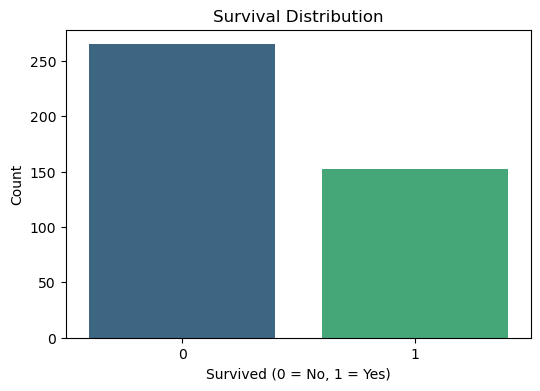

In [18]:
# Bar plot for survival distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

C:\Users\SHIZA  SHABBIR\AppData\Local\Temp\ipykernel_11992\1870741032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, palette='pastel')


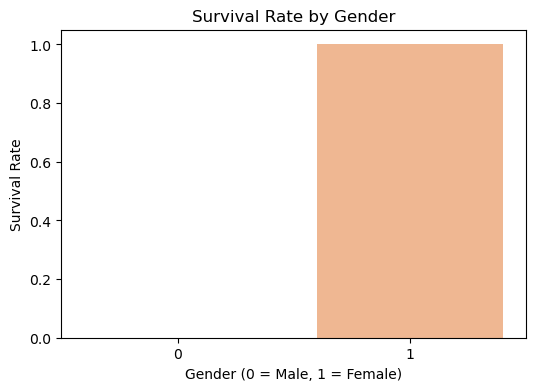

In [19]:
# Survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=data, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\SHIZA  SHABBIR\AppData\Local\Temp\ipykernel_11992\409056146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='magma')


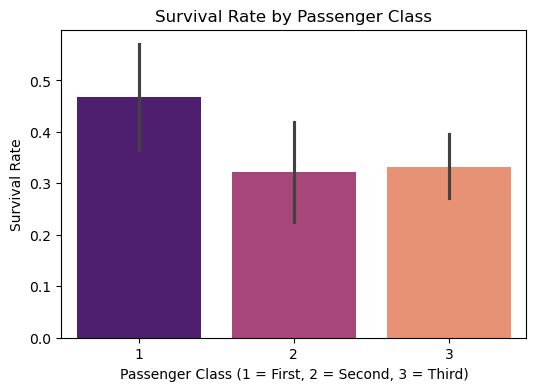

In [20]:
# Survival rate by passenger class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=data, palette='magma')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Survival Rate')
plt.show()

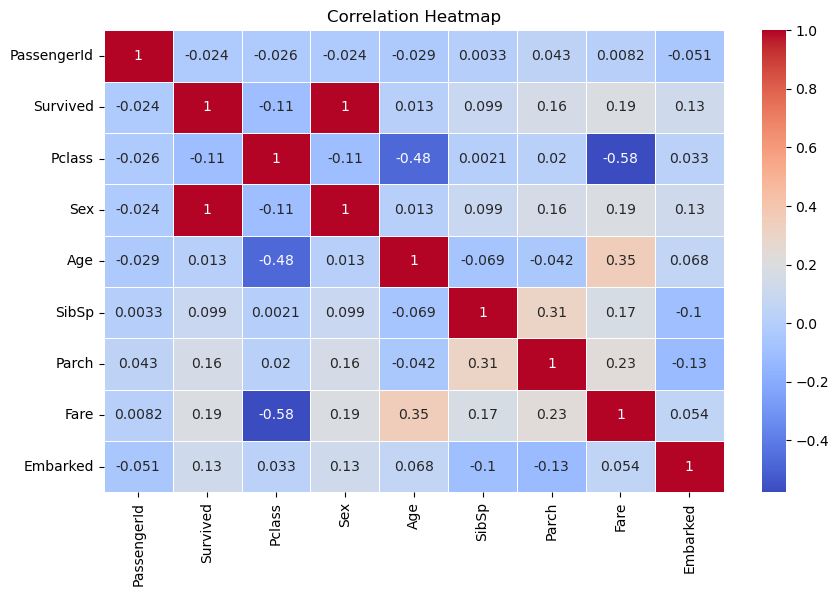

In [22]:
# Heatmap of correlation between variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()